In [6]:
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.layers import LSTM, Dropout
from keras.layers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout, RepeatVector
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import pickle
import sys
import heapq
import seaborn as sns
from pylab import rcParams

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 12, 5

Using TensorFlow backend.


In [1]:
text="harry.txt"
text=open(text).read().lower()
print('corpus length:', len(text))

corpus length: 5


In [8]:
chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

print(f'unique chars: {len(chars)}')

unique chars: 56


In [9]:
SEQUENCE_LENGTH = 20
step = 5
sentences = []
next_chars = []
for i in range(0, len(text) - SEQUENCE_LENGTH, step):
    sentences.append(text[i: i + SEQUENCE_LENGTH])
    next_chars.append(text[i + SEQUENCE_LENGTH])
print(f'num training examples: {len(sentences)}')

num training examples: 88550


In [10]:
X = np.zeros((len(sentences), SEQUENCE_LENGTH, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

In [11]:
X.shape

(88550, 20, 56)

In [1]:
y.shape

NameError: name 'y' is not defined

In [37]:
model_new = Sequential()
model_new.add(LSTM(128, input_shape=(SEQUENCE_LENGTH, len(chars))))
model_new.add(Dense(128))
model_new.add(Dense(128))
model_new.add(Dense(128))
model_new.add(Dense(128))
model_new.add(Dense(128))
model_new.add(Dense(128))
model_new.add(Dense(56))
model_new.add(Activation('softmax'))

In [38]:
optimizer = RMSprop(lr=0.01)
model_new.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model_new.fit(X, y, validation_split=0.10, batch_size=128, epochs=10, shuffle=True).history

Train on 79695 samples, validate on 8855 samples
Epoch 1/10
79695/79695 [==============================] - 13s 160us/step - loss: 37.0323 - accuracy: 0.1479 - val_loss: 2.7521 - val_accuracy: 0.2475
Epoch 2/10
79695/79695 [==============================] - 12s 156us/step - loss: 2.9937 - accuracy: 0.2007 - val_loss: 3.3670 - val_accuracy: 0.1240
Epoch 3/10
79695/79695 [==============================] - 12s 156us/step - loss: 2.8088 - accuracy: 0.2388 - val_loss: 2.3867 - val_accuracy: 0.3204
Epoch 4/10
79695/79695 [==============================] - 13s 160us/step - loss: 2.4822 - accuracy: 0.3345 - val_loss: 2.1713 - val_accuracy: 0.3802
Epoch 5/10
79695/79695 [==============================] - 13s 163us/step - loss: 2.4719 - accuracy: 0.3970 - val_loss: 2.1334 - val_accuracy: 0.4123
Epoch 6/10
79695/79695 [==============================] - 13s 165us/step - loss: 1.9906 - accuracy: 0.4386 - val_loss: 2.0287 - val_accuracy: 0.4435
Epoch 7/10
79695/79695 [==============================] 

In [46]:
model_new.save('keras_model_new.h5')
pickle.dump(history, open("history.p", "wb"))

In [47]:
model_new = load_model('keras_model_new.h5')
history = pickle.load(open("history.p", "rb"))

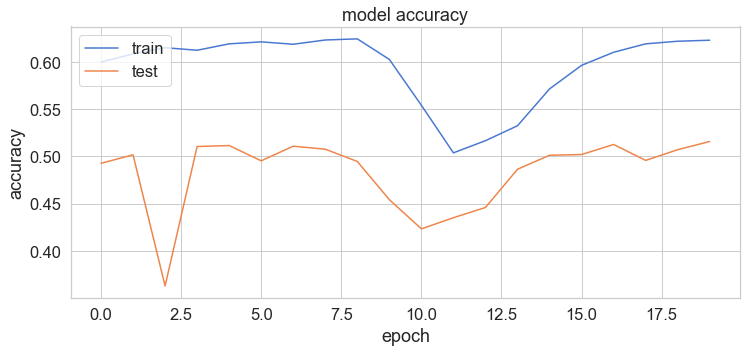

In [52]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');

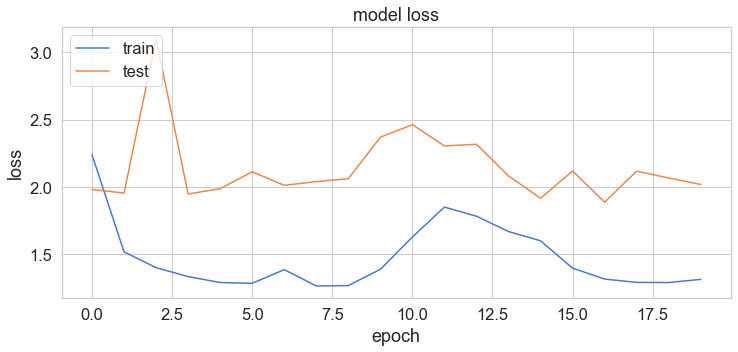

In [53]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left');


In [ ]:
def prepare_input(text):
    x = np.zeros((1, SEQUENCE_LENGTH, len(chars)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

In [43]:
model_new.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 128)               94720     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 128)              

In [50]:
model_new.fit(X, y, validation_split=0.10, batch_size=128, epochs=20, shuffle=True)

Train on 79695 samples, validate on 8855 samples
Epoch 1/20
79695/79695 [==============================] - 13s 159us/step - loss: 1.7755 - accuracy: 0.5190 - val_loss: 1.8614 - val_accuracy: 0.4888
Epoch 2/20
79695/79695 [==============================] - 12s 156us/step - loss: 1.6280 - accuracy: 0.5313 - val_loss: 1.7624 - val_accuracy: 0.5119
Epoch 3/20
79695/79695 [==============================] - 12s 156us/step - loss: 1.5822 - accuracy: 0.5410 - val_loss: 1.7753 - val_accuracy: 0.5072
Epoch 4/20
79695/79695 [==============================] - 13s 157us/step - loss: 1.5418 - accuracy: 0.5516 - val_loss: 1.7581 - val_accuracy: 0.5127
Epoch 5/20
79695/79695 [==============================] - 13s 165us/step - loss: 1.5461 - accuracy: 0.5547 - val_loss: 1.8412 - val_accuracy: 0.4990
Epoch 6/20
79695/79695 [==============================] - 13s 166us/step - loss: 1.5225 - accuracy: 0.5581 - val_loss: 1.8267 - val_accuracy: 0.5093
Epoch 7/20
79695/79695 [==============================] -

In [51]:
history=model_new.fit(X, y, validation_split=0.10, batch_size=128, epochs=20, shuffle=True).history

Train on 79695 samples, validate on 8855 samples
Epoch 1/20
79695/79695 [==============================] - 13s 164us/step - loss: 2.2398 - accuracy: 0.5999 - val_loss: 1.9814 - val_accuracy: 0.4928
Epoch 2/20
79695/79695 [==============================] - 13s 166us/step - loss: 1.5183 - accuracy: 0.6085 - val_loss: 1.9555 - val_accuracy: 0.5018
Epoch 3/20
79695/79695 [==============================] - 13s 165us/step - loss: 1.4012 - accuracy: 0.6151 - val_loss: 3.1005 - val_accuracy: 0.3631
Epoch 4/20
79695/79695 [==============================] - 13s 162us/step - loss: 1.3348 - accuracy: 0.6124 - val_loss: 1.9481 - val_accuracy: 0.5106
Epoch 5/20
79695/79695 [==============================] - 13s 163us/step - loss: 1.2908 - accuracy: 0.6191 - val_loss: 1.9876 - val_accuracy: 0.5116
Epoch 6/20
79695/79695 [==============================] - 13s 165us/step - loss: 1.2850 - accuracy: 0.6212 - val_loss: 2.1132 - val_accuracy: 0.4954
Epoch 7/20
79695/79695 [==============================] -